# Trabajo Practico N° 1 Introducción al Procesamiento Digital de Imágenes(IPDI)

- **Alumno :-** Rodriguez Franco Jonatan Angel 
- **Carrera :-** Ingenieria Informatica 
- **L.U :-** 7207

In [ ]:
1:- Normalizar los valores de RGB del pixel
2:- RGB -> YIQ (utilizando la segunda matriz)
3:- Y’ := aY ;
4:- I’ := bI ; Q’ := bQ ;
5:- Chequear que Y’ <= 1 (para que no se vaya de rango)
6:- Chequear -0.5957 < I’ < 0.5957 y -0.5226 < Q’ < 0.5226
7:- Y’I’Q’ -> R’G’B’ (el RGB normalizado del pixel procesado)

In [5]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Convertimos de RGB a YIQ
def RGBaYIQ(img):
#Normalizamos los valores RGB de 0 a 1  
  r = img[:,:,0]/255
  g = img[:,:,1]/255
  b = img[:,:,2]/255

  Y = (r*0.299+g*0.587+b*0.114)
  I = (r*0.595716-g*0.274453-b*0.321263)
  Q = (r*0.211456-g*0.522591+b*0.311135)
  return(Y,I,Q)


In [ ]:
#Convertimos de YIQ a RGB 
def YIQaRGB(Y,I,Q):
#Verificamos que los valores YIQ esten dentro del rango 
 Y = np.clip(Y,0.0,1.0)
 I = np.clip(I,-0.5957,0.5957)  
 Q = np.clip(Q,-0.5226,0.5226)
    
 R = (Y+0.9563*I+0.621*Q)*255
 G = (Y-0.2721*I-0.6474*Q)*255
 B = (Y-1.1070*I+1.7046*Q)*255
    
 R = R.astype(int)
 G = G.astype(int)
 B = B.astype(int) 
 return (R,G,B) 

### 1:-Cargamos una IMAGEN

Text(0.5, 1.0, 'Imagen Original')

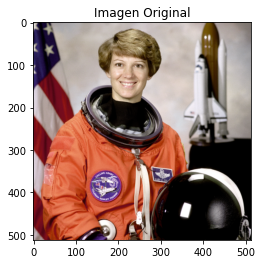

In [7]:
im = imageio.imread('imageio:astronaut.png') #Cargamos la imagen RGB
plt.imshow(im)
plt.title("Imagen Original")

#### 2:- Convertimos la imagen RGB a YIQ

In [3]:
Y,I,Q = RGBaYIQ(im)
grafRGBaYIQ=np.stack((Y,I,Q),axis=2)
plt.imshow(grafRGBaYIQ)
plt.title("Imagen de RGB -> YIQ")

NameError: name 'RGBaYIQ' is not defined

#### 3:- Convertimos la imagen YIQ a RGB y modificamos la Luminancia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen de YIQ -> RGB con - Alfa = 0.4 - Beta = 1')

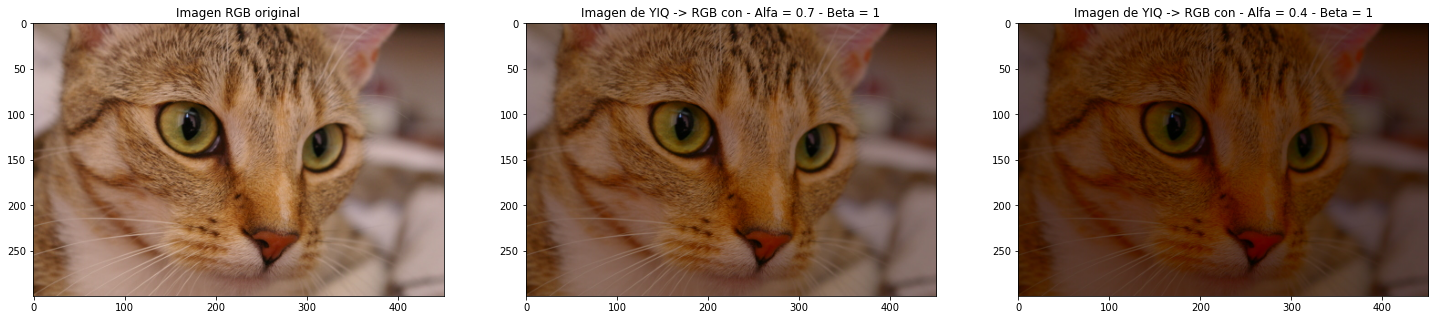

In [115]:
#obtenemos la matriz de la convercion de RGB a YQI  y procedemos hacer la forma inversa
#modificamos la luminancia menor que 1
alpha1 = 0.7
alpha2 = 0.4
beta = 1

(y,i,q) = YIQaRGB(alpha1*Y,beta*I,beta*Q)
lumi1=np.stack((y,i,q),axis=2)
(yy,ii,qq) = YIQaRGB(alpha2*Y,beta*I,beta*Q)
lumi2=np.stack((yy,ii,qq),axis=2)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,25)

plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Imagen RGB original")

plt.subplot(1,3,2)
plt.imshow(lumi1)
plt.title(f"Imagen de YIQ -> RGB con - Alfa = {alpha1} - Beta = {beta}")

plt.subplot(1,3,3)
plt.imshow(lumi2)
plt.title(f"Imagen de YIQ -> RGB con - Alfa = {alpha2} - Beta = {beta}")
    
    


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagen de YIQ -> RGB con - Alfa = 1.5 - Beta = 1')

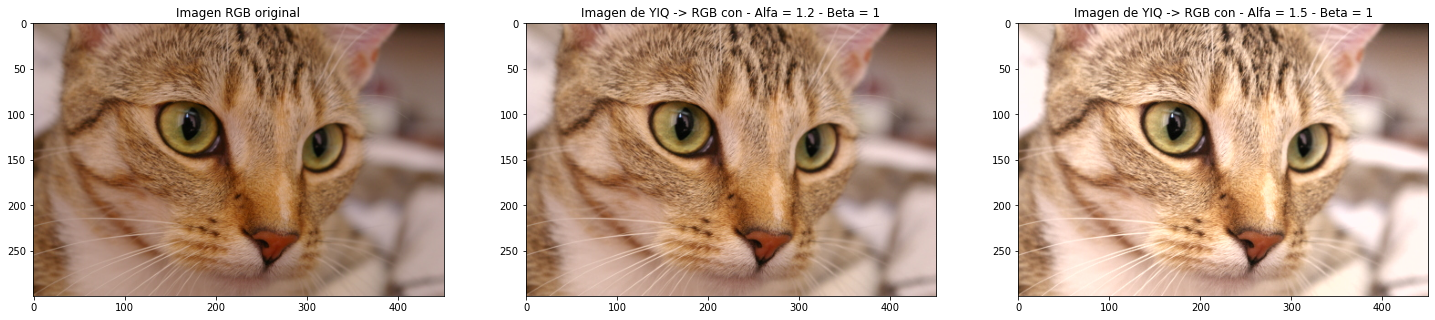

In [116]:
#obtenemos la matriz de la convercion de RGB a YQI  y procedemos hacer la forma inversa
#modificamos la luminancia mayor que 1
alpha1 = 1.2
alpha2 = 1.5
beta = 1

(y,i,q) = YIQaRGB(alpha1*Y,beta*I,beta*Q)
lumi1=np.stack((y,i,q),axis=2)
(yy,ii,qq) = YIQaRGB(alpha2*Y,beta*I,beta*Q)
lumi2=np.stack((yy,ii,qq),axis=2)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,25)

plt.subplot(1,3,1)
plt.imshow(im)
plt.title("Imagen RGB original")

plt.subplot(1,3,2)
plt.imshow(lumi1)
plt.title(f"Imagen de YIQ -> RGB con - Alfa = {alpha1} - Beta = {beta}")

plt.subplot(1,3,3)
plt.imshow(lumi2)
plt.title(f"Imagen de YIQ -> RGB con - Alfa = {alpha2} - Beta = {beta}")
    

> ***Como se puede observar si el valor de la luminancia es menor que uno se observa que se reduce la luminancia de la imagen, en caso contrario de que la luminancia es mayor uno aumenta la luminancia de la imagen***

### YIQ A RGB

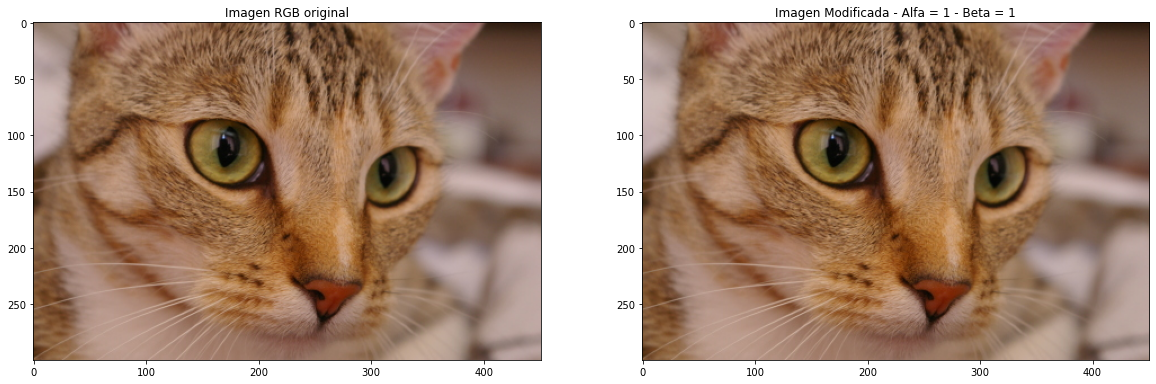

In [126]:
#obtenemos la matriz de la convercion de RGB a YQI  y procedemos hacer la forma inversa
alpha = 1
beta = 1

(y,i,q) = YIQaRGB(alpha*Y,beta*I,beta*Q)
modificado=np.stack((y,i,q),axis=2)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,20)

plt.subplot(1,2,1)
plt.imshow(im)
plt.title("Imagen RGB original")

plt.subplot(1,2,2)
plt.imshow(modificado)
plt.title(f"Imagen Modificada - Alfa = {alpha} - Beta = {beta}")

plt.show()

> ***Atravez del ojo humano no se puede observar cambios cuando convertimos de RGB a YIQ y despues volver de YIQ a RGB***


Text(0.5, 1.0, 'YIQ a RGB')

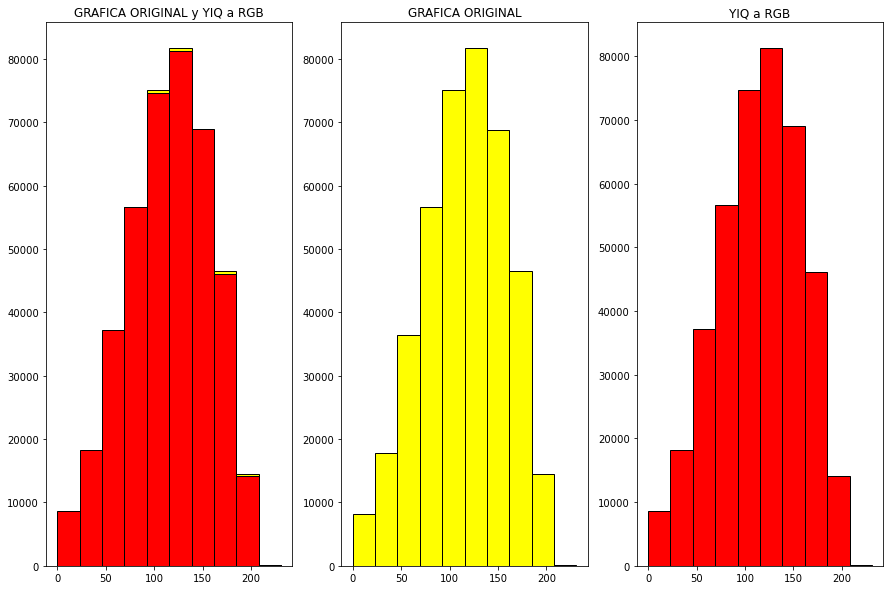

In [161]:
(y,i,q) = YIQaRGB(alpha*Y,beta*I,beta*Q)
modificado=np.stack((y,i,q),axis=2)
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(15,10)
plt.subplot(1,3,1)
plt.hist(im.ravel(), 10, color="yellow", ec="black");
plt.hist(modificado.ravel(), 10, color="red", ec="black");
plt.title("GRAFICA ORIGINAL y YIQ a RGB")
plt.subplot(1,3,2)
plt.hist(im.ravel(), 10, color="yellow", ec="black");
plt.title("GRAFICA ORIGINAL")
plt.subplot(1,3,3)
plt.hist(modificado.ravel(), 10, color="red", ec="black");
plt.title("YIQ a RGB")

> ***Atravez de los histrograma se puede ver un pequeño cambio, de convertir una imagen RGB A YIQ  y despues volver a la imagen original***

Modificamos la luminancia y saturación

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


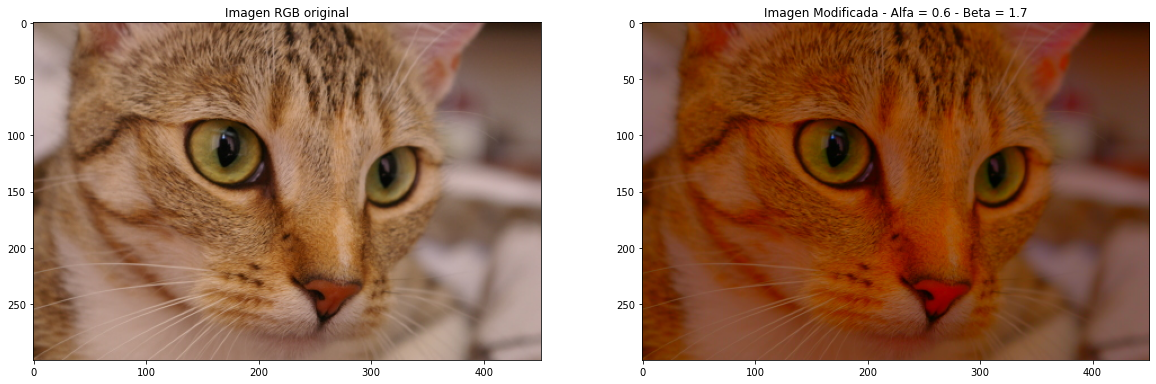

In [164]:
#obtenemos la matriz d|e la convercion de RGB a YQI  y procedemos hacer la forma inversa
alpha = 0.6
beta = 1.7

(y,i,q) = YIQaRGB(alpha*Y,beta*I,beta*Q)
modificado=np.stack((y,i,q),axis=2)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,20)

plt.subplot(1,2,1)
plt.imshow(im)
plt.title("Imagen RGB original")

plt.subplot(1,2,2)
plt.imshow(modificado)
plt.title(f"Imagen Modificada - Alfa = {alpha} - Beta = {beta}")
    
    
plt.show()